# 1. Boston 집 가격 예측하는 모델

## 데이터 로드 및 전처리
---
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


- 데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 아래의 주석을 보고 코드를 작성해 보세요.

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.

mean = train_data.mean(axis = 0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.

std = train_data.std(axis = 0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.

# mean = test_data.mean(axis = 0)
# std = test_data.std(axis = 0)

test_data = test_data - mean
test_data = test_data / std

'''
테스트 데이터를 정규화할 때 사용하는 평균(mean)과 표준편차(std)는 
테스트 데이터셋의 것이 아니라 훈련 데이터셋에서 계산된 값이어야 합니다.

기계 학습에서는 테스트 데이터를 포함하여 데이터 전처리 과정에서 나온 어떠한 값도 
훈련 데이터에만 기반해야 합니다. 
이렇게 하는 이유는 모델이 훈련 데이터에만 익숙해지도록 하고, 
실제 예측 시 테스트 데이터셋이나 실제 운영 환경의 데이터가 모델에게는 
새로운 것으로 간주되어야 하기 때문입니다.
'''

'\n테스트 데이터를 정규화할 때 사용하는 평균(mean)과 표준편차(std)는 \n테스트 데이터셋의 것이 아니라 훈련 데이터셋에서 계산된 값이어야 합니다.\n\n기계 학습에서는 테스트 데이터를 포함하여 데이터 전처리 과정에서 나온 어떠한 값도 \n훈련 데이터에만 기반해야 합니다. \n이렇게 하는 이유는 모델이 훈련 데이터에만 익숙해지도록 하고, \n실제 예측 시 테스트 데이터셋이나 실제 운영 환경의 데이터가 모델에게는 \n새로운 것으로 간주되어야 하기 때문입니다.\n'

## 모델 구성 및 컴파일
---
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(layers.Dense(128, input_shape = (train_data.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(1))

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

## 모델 학습
---
- epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
from tensorflow.keras import callbacks

# ModelCheckpoint 콜백 정의
check_point_cb = callbacks.ModelCheckpoint("keras_boston_model.h5", save_best_only=True)

# EarlyStopping 콜백 정의
early_stopping_cb = callbacks.EarlyStopping(patience=5, 
                                            monitor='val_loss', 
                                            restore_best_weights=True)

# 모델 학습
history = model.fit(train_data, train_labels, epochs=200,
                    validation_split=0.2, batch_size=64, verbose=1,
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/200
6/6 [==============================] - 2s 41ms/step - loss: 551.7248 - mae: 21.8411 - val_loss: 630.4308 - val_mae: 23.4268
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 525.9011 - mae: 21.5288 - val_loss: 622.2830 - val_mae: 23.3119
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 506.9040 - mae: 21.2497 - val_loss: 613.1027 - val_mae: 23.1712
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 492.2809 - mae: 21.0015 - val_loss: 603.3058 - val_mae: 23.0153
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 477.8087 - mae: 20.7704 - val_loss: 593.3570 - val_mae: 22.8537
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 467.2050 - mae: 20.5405 - val_loss: 583.1432 - val_mae: 22.6831
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 454.3113 - mae: 20.3226 - val_loss: 572.4337 - val_mae: 22.4999
Epoch 8/200
6/6 [==============================] - 0s 

6/6 [==============================] - 0s 8ms/step - loss: 48.4188 - mae: 6.3142 - val_loss: 64.6091 - val_mae: 7.3343
Epoch 62/200
6/6 [==============================] - 0s 8ms/step - loss: 44.8478 - mae: 6.0973 - val_loss: 62.6910 - val_mae: 7.2047
Epoch 63/200
6/6 [==============================] - 0s 13ms/step - loss: 43.8149 - mae: 5.9208 - val_loss: 62.7447 - val_mae: 7.1985
Epoch 64/200
6/6 [==============================] - 0s 8ms/step - loss: 40.0196 - mae: 5.6224 - val_loss: 69.8027 - val_mae: 7.5551
Epoch 65/200
6/6 [==============================] - 0s 8ms/step - loss: 37.6805 - mae: 5.3421 - val_loss: 63.8494 - val_mae: 7.2237
Epoch 66/200
6/6 [==============================] - 0s 8ms/step - loss: 36.8909 - mae: 5.2277 - val_loss: 52.7445 - val_mae: 6.5458
Epoch 67/200
6/6 [==============================] - 0s 8ms/step - loss: 31.0948 - mae: 4.9284 - val_loss: 52.4086 - val_mae: 6.5446
Epoch 68/200
6/6 [==============================] - 0s 8ms/step - loss: 32.3877 - mae: 4

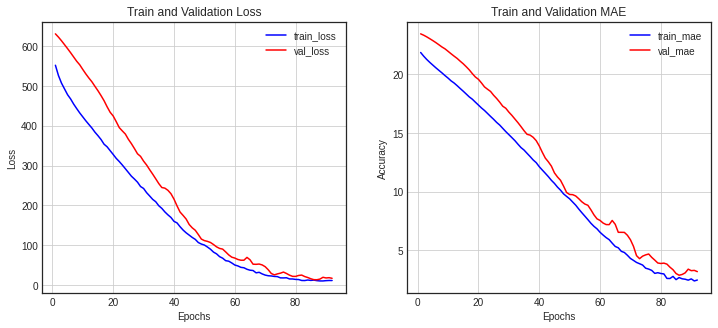

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측
- 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 21.7577 - mae: 3.4144


[21.75766372680664, 3.4143874645233154]

# 2. Reuters 딥러닝 모델

## 데이터 로드 및 전처리
---
- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from tensorflow.keras.datasets import reuters
from sklearn.model_selection import train_test_split

# Reuters 데이터셋 로드
# 데이터셋에서 빈도가 높은 상위 10,000개의 단어만 사용
(full_train_data, full_train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋을 훈련과 검증 데이터셋으로 분리
# 훈련 데이터셋의 25%를 검증 데이터셋으로 사용
train_data, val_data, train_labels, val_labels = train_test_split(full_train_data, 
                                                                  full_train_labels,
                                                                  test_size=0.25,
                                                                  random_state=123)

# 분리된 훈련, 검증, 테스트 데이터셋의 크기를 출력
print(len(train_data))   # 훈련 데이터셋의 크기
print(len(val_data))     # 검증 데이터셋의 크기
print(len(test_data))    # 테스트 데이터셋의 크기

# 훈련 레이블에 포함된 고유한 클래스의 수를 출력
print(len(set(train_labels)))  # 훈련 레이블의 고유한 값의 개수


6736
2246
2246
46


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
- 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
import numpy as np
from tensorflow.keras import utils

# 텍스트 데이터의 원-핫 인코딩을 수행하는 함수
def one_hot_encoding(data, dim=10000):
    # 전달된 데이터셋의 길이와 지정된 차원 크기로 0으로 채워진 배열을 생성
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):  # 데이터셋을 반복
        results[i, d] = 1  # 각 샘플에 대해 인덱스 위치에 1을 할당하여 원-핫 인코딩 수행
    return results  # 변환된 데이터 반환

# 훈련, 검증, 테스트 데이터를 원-핫 인코딩으로 변환
x_train = one_hot_encoding(train_data)  # 훈련 데이터 원-핫 인코딩
x_val = one_hot_encoding(val_data)      # 검증 데이터 원-핫 인코딩
x_test = one_hot_encoding(test_data)    # 테스트 데이터 원-핫 인코딩

# 레이블 데이터를 범주형(원-핫) 형태로 변환
y_train = utils.to_categorical(train_labels)  # 훈련 레이블 원-핫 인코딩
y_val = utils.to_categorical(val_labels)      # 검증 레이블 원-핫 인코딩
y_test = utils.to_categorical(test_labels)    # 테스트 레이블 원-핫 인코딩

## 모델 구성 및 컴파일
---
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

from tensorflow.keras import models, layers

# 케라스의 Sequential 모델을 초기화합니다. Sequential 모델은 레이어를 선형으로 쌓아가는 모델입니다.
model = models.Sequential()

# 입력 레이어로 Dense 레이어를 추가합니다. Dense 레이어는 완전 연결 레이어입니다.
# 첫 번째 인자는 레이어의 유닛 수이며, input_shape는 입력 데이터의 형태를 지정합니다.
model.add(layers.Dense(128, input_shape=(10000,)))

# 배치 정규화 레이어를 추가합니다. 이는 각 배치의 출력을 정규화하여
# 모델이 학습하는 동안 안정적으로 유지되도록 도와줍니다.
model.add(layers.BatchNormalization())

# 활성화 함수로 ReLU를 사용합니다. ReLU는 비선형 활성화 함수입니다.
model.add(layers.Activation('relu'))

# 드롭아웃 레이어를 추가하여 과적합을 방지합니다. 0.5의 드롭아웃 비율은
# 훈련하는 동안 무작위로 절반의 출력 특성을 0으로 설정합니다.
model.add(layers.Dropout(0.5))

# 두 번째 Dense 레이어를 추가합니다. 이 레이어는 이전 레이어의 출력을 입력으로 받습니다.
model.add(layers.Dense(128))

# 두 번째 Dense 레이어에 대해서도 배치 정규화를 수행합니다.
model.add(layers.BatchNormalization())

# 두 번째 Dense 레이어의 활성화 함수로 ReLU를 사용합니다.
model.add(layers.Activation('relu'))

# 과적합을 방지하기 위해 또 다른 드롭아웃 레이어를 추가합니다.
model.add(layers.Dropout(0.5))

# 출력 레이어로 Dense 레이어를 추가합니다. 이 레이어는 46개의 유닛을 가지며,
# 각 유닛은 한 개의 뉴스 카테고리를 나타냅니다. softmax 활성화 함수를 사용하여,
# 각 클래스에 대한 확률 분포를 출력합니다.
model.add(layers.Dense(46, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation_4 (Activation)    (None, 128)              

## 모델 학습
---
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=200,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/200
211/211 [==============================] - 2s 7ms/step - loss: 1.8939 - accuracy: 0.5735 - val_loss: 1.5104 - val_accuracy: 0.6963
Epoch 2/200
211/211 [==============================] - 1s 5ms/step - loss: 1.2108 - accuracy: 0.7196 - val_loss: 1.1272 - val_accuracy: 0.7542
Epoch 3/200
211/211 [==============================] - 1s 5ms/step - loss: 0.9829 - accuracy: 0.7641 - val_loss: 1.0533 - val_accuracy: 0.7801
Epoch 4/200
211/211 [==============================] - 1s 5ms/step - loss: 0.8167 - accuracy: 0.8000 - val_loss: 1.0263 - val_accuracy: 0.7872
Epoch 5/200
211/211 [==============================] - 1s 5ms/step - loss: 0.7108 - accuracy: 0.8281 - val_loss: 1.0133 - val_accuracy: 0.7903
Epoch 6/200
211/211 [==============================] - 1s 5ms/step - loss: 0.6062 - accuracy: 0.8481 - val_loss: 1.0060 - val_accuracy: 0.7930
Epoch 7/200
211/211 [==============================] - 1s 5ms/step - loss: 0.5443 - accuracy: 0.8612 - val_loss: 0.9893 - val_accuracy: 0.7921

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

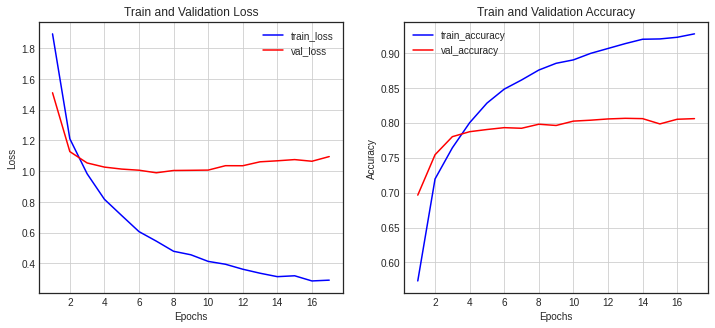

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측
---
- 테스트 데이터셋을 이용해 모델을 평가합니다.

In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.

model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9694 - accuracy: 0.7943


[0.9693554639816284, 0.7943009734153748]

# 3. CIFAR10 딥러닝 모델

CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.

## 데이터 로드 및 전처리
---
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

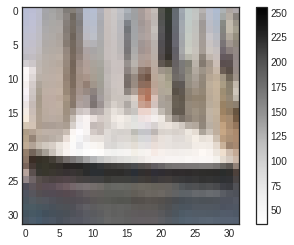

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.

x_train = x_train.reshape(-1, 3072)
x_val = x_val.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일
---
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [23]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

from tensorflow.keras import models, layers

# 케라스의 Sequential 모델을 초기화합니다. 
# Sequential 모델은 레이어를 선형적으로 쌓아가는 단순한 방식의 모델입니다.
model = models.Sequential()

# 첫 번째 Dense 레이어(완전 연결 레이어)를 추가합니다.
# 이 레이어는 2048개의 유닛을 가지며, 입력 차원은 훈련 데이터의 특성 수와 같습니다.
model.add(layers.Dense(2048, input_shape=(x_train.shape[1],)))

# 첫 번째 Dense 레이어 뒤에 배치 정규화 레이어를 추가합니다. 
# 이는 각 배치에서 출력값을 정규화하여 학습과정을 안정화시키고 빠르게 만듭니다.
model.add(layers.BatchNormalization())

# ReLU 활성화 함수를 적용합니다. ReLU는 음수 값을 0으로 만드는 비선형 함수입니다.
model.add(layers.Activation('relu'))

# 과적합을 방지하기 위해 드롭아웃을 적용합니다. 여기서는 유닛의 50%를 무작위로 꺼냅니다.
model.add(layers.Dropout(0.5))

# 두 번째 Dense 레이어를 추가합니다. 이 레이어는 1024개의 유닛을 가집니다.
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# 세 번째 Dense 레이어를 추가합니다. 이 레이어는 512개의 유닛을 가집니다.
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# 최종 출력 레이어입니다. 10개의 유닛을 가지며, softmax 활성화 함수를 사용하여
# 다중 분류 문제에 적합한 확률 분포를 출력합니다.
model.add(layers.Dense(10, activation='softmax'))

# 모델의 구조를 요약하여 출력합니다.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_5 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_6 (Activation)    (None, 1024)             

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_5 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_6 (Activation)    (None, 1024)             

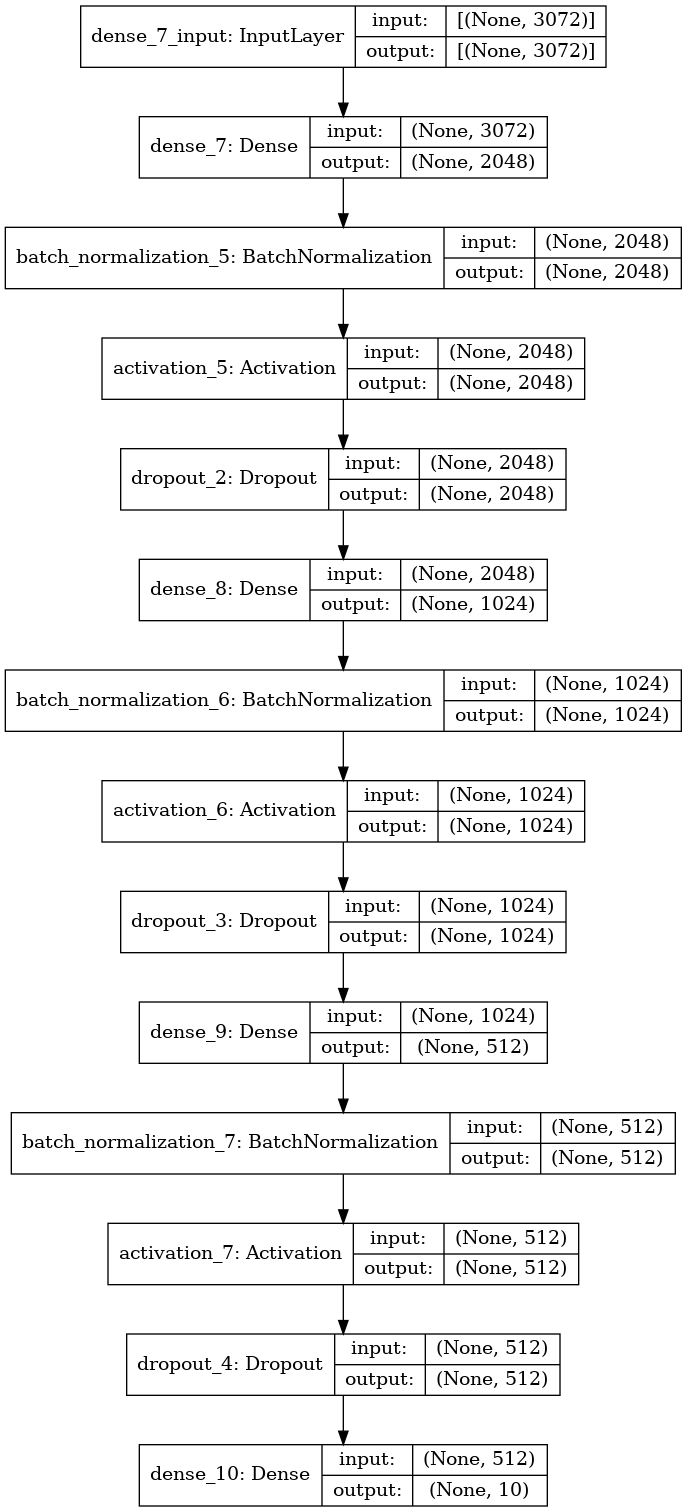

In [25]:
utils.plot_model(model, show_shapes=True)

## 모델 학습
---
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [26]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('keras_cifar10_model.h5', save_best_only = True)
early_stopping_cb = callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 200,
                    validation_data = (x_val, y_val),
                    callbacks = [check_point_cb, early_stopping_cb])

Epoch 1/200
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9524 - accuracy: 0.3192 - val_loss: 1.7297 - val_accuracy: 0.3669
Epoch 2/200
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6715 - accuracy: 0.4016 - val_loss: 2.0853 - val_accuracy: 0.2856
Epoch 3/200
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5967 - accuracy: 0.4308 - val_loss: 1.7105 - val_accuracy: 0.3914
Epoch 4/200
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5433 - accuracy: 0.4469 - val_loss: 1.5354 - val_accuracy: 0.4494
Epoch 5/200
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4971 - accuracy: 0.4666 - val_loss: 1.6458 - val_accuracy: 0.4129
Epoch 6/200
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4616 - accuracy: 0.4764 - val_loss: 1.6417 - val_accuracy: 0.4137
Epoch 7/200
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4280 - accuracy: 0.4895 - val_loss: 1.4283 - val_ac

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

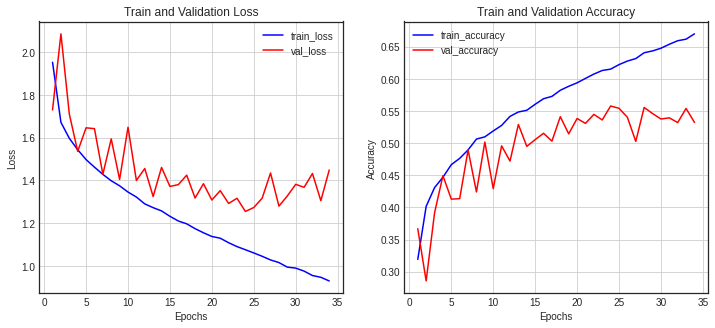

In [27]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측
---
- 테스트 데이터셋을 이용해 모델을 평가합니다.

In [28]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2503 - accuracy: 0.5557


[1.2502784729003906, 0.5557000041007996]

사실 지금까지 배운 Dense Layer만 활용해서는 이번 프로젝트에서 높은 accuracy를 얻기는 힘듭니다. 이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 합니다. CNN에 대한 내용은 Computer Vision 과정을 통해 더 배울 수 있습니다.

평가문항	
1. Boston 주택 가격 예측 프로젝트를 성공적으로 완료하였는가?	
상세기준 : 프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.  
  
  
2. Reuters 데이터의 분류 프로젝트를 성공적으로 완료하였는가?	
상세기준 : 프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.  
  
  
3. CIFAR10 데이터의 분류 프로젝트를 성공적으로 완료하였는가?	
상세기준 : 프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.  